<p>Ali Morajjabi - 610300104</p>
<hr>
<h1 style="color:orange">Clustering on Image</h1>




<h2 style="color:#9cff00">Feature Extraction</h2>

<p>
In this section, we employ the VGG16 neural network model to extract image features. You might wonder, why not simply read the pixels and use them as the features for each image? Well, there are several reasons why we chose this approach:

<strong style="color:#e5fa04">1. Hierarchical Representation:</strong> VGG16 captures hierarchical representations of images through its convolutional layers. This allows for the extraction of abstract features at different levels of granularity, capturing both low-level details (like edges and textures) and high-level semantic information (like object shapes and patterns.)
</p>

<p>
<strong style="color:#e5fa04">2. Dimensionality Reduction:</strong> The features extracted by VGG16 typically have lower dimensionality compared to raw pixel values. This can lead to more efficient representation and computation, especially in scenarios with high-dimensional data.
</p>

<p>
<strong style="color:#e5fa04">3. Transfer Learning:</strong> VGG16 is pre-trained on large-scale image datasets like ImageNet, which enables transfer learning. By utilizing pre-trained models, we can leverage knowledge learned from vast amounts of data to improve performance on our specific task, even with limited training data.
</p>

To prepare the pixel data for the model, we need to ensure it's properly formatted. This involves flattening the pixels of each image and some operations such as mean subtraction and scaling, which help to ensure that the input data is in a suitable format for the model and enhances its performance.

In [791]:
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.preprocessing import Normalizer
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_distances
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
# << Load the pre-trained VGG16 model without the top (fully connected) layers >>
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


images_data = list()

# Load and preprocess the image
for path in list(os.listdir("./flower_images")):
    flower_file_path = "./flower_images/" + path
    img = Image.open(flower_file_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Get the features
    features = model.predict(x)
    features = np.array(features).flatten()
    images_data.append(features)

Text(0, 0.5, 'Second principle component')

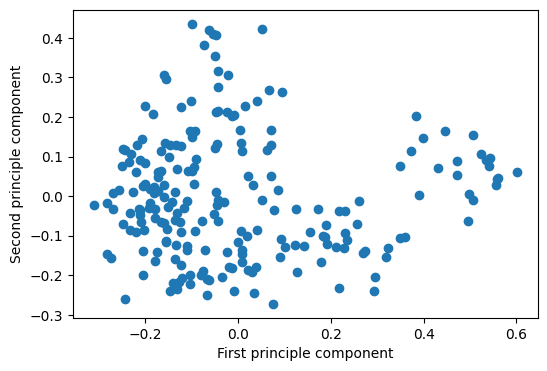

In [774]:
# << Showing the unlabeled data points >>
df = pd.DataFrame(images_data)

scaler = Normalizer()
df = scaler.fit_transform(df)

pca=PCA(n_components=2)
pca.fit(df)
x_pca=pca.fit_transform(df)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


<h2 style="color:#9cff00">K-means</h2>



<h4 style="color:#e5fa04">Advantages:</h4>

1. <strong>Simple Implementation:</strong> k-means is straightforward to implement and easy to understand, making it a popular choice for clustering tasks.

2. <strong>Efficiency:</strong> It is computationally efficient and scales well to large datasets, making it suitable for applications with a large number of data points.

3. <strong>Scalability</strong> k-means can handle large datasets efficiently due to its linear time complexity.

4. <strong>Cluster Interpretability:</strong> The clusters produced by k-means tend to be spherical and well-separated, which can make them easy to interpret.

<h4 style="color:#e5fa04">Disadvantages:</h4>

1. <strong>Sensitive to Initialization:</strong> The final clustering result can be sensitive to the initial centroids' placement, which may lead to different solutions on different runs.

2. <strong>Assumes Equal Variance:</strong> k-means assumes that clusters are isotropic and have equal variance, which may not hold true for all datasets. It performs poorly on non-linear or non-spherical clusters.
Requires Predefined Number of Clusters: The number of clusters (k) needs to be specified a priori, which might not always be known or intuitive.

3. <strong>Outliers Impact Results:</strong> Outliers can significantly affect the clustering results since each point is assigned to the nearest centroid, potentially resulting in distorted clusters.




In [713]:
# pca_4 = PCA(n_components=6)
# pca_4.fit(df)
# df = pca_4.transform(df)

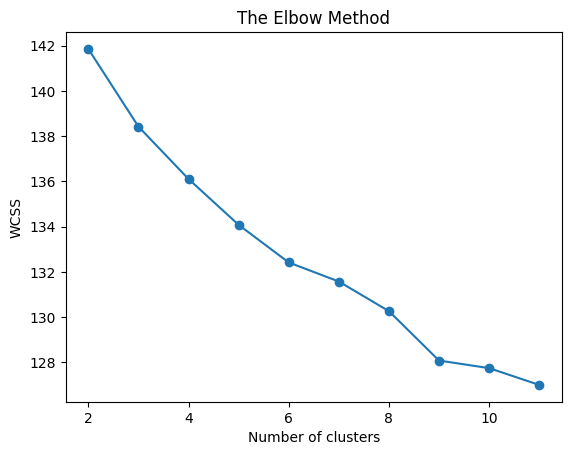

In [718]:
# << Finding the Suitable K for K-Means Algorithm (WCSS Method (Within-Cluster Sum of Squares)) >>
wcss = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, init="random", n_init="auto", max_iter=300, random_state=8)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(2, 12), wcss, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

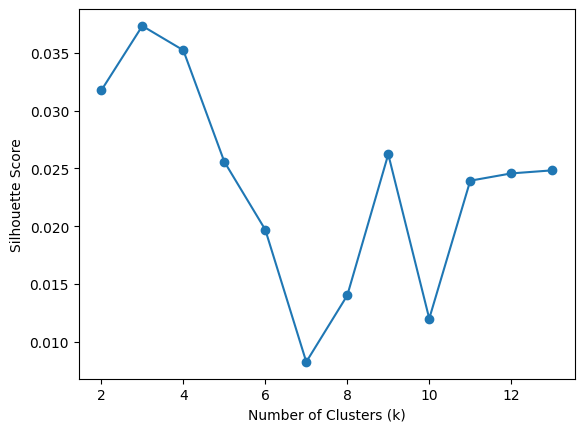

In [723]:
# << Finding the Suitable K for K-Means Algorithm (Silhouette Method) >>

silhouette_scores = []

# Try different values of k
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k, init="random", n_init="auto", max_iter=300, random_state=8)
    cluster_labels = kmeans.fit_predict(df)
    score = silhouette_score(df, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette scores for different values of k
plt.plot(range(2, 14), silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [763]:
# << Showing K-Means algorithm result with the Chosen K (K = 9) >>
km = KMeans(n_clusters=9, init="random", max_iter=300, n_init="auto", random_state=8)
km.fit(df)

labels = km.labels_
centers = km.cluster_centers_

# print(centers)
print(labels)

[1 1 7 1 1 0 5 1 1 1 3 1 1 6 6 0 1 1 3 3 7 8 6 8 2 3 7 3 7 3 3 1 3 5 3 1 3
 2 7 1 1 1 6 3 1 8 7 4 1 0 4 8 6 5 3 3 5 1 3 1 7 0 6 1 1 2 3 3 7 8 5 6 5 0
 2 3 3 3 1 3 0 8 4 5 1 2 7 8 3 8 6 0 2 7 0 3 1 0 1 3 0 7 8 2 0 6 1 3 1 3 5
 8 7 1 2 3 1 3 1 1 2 7 8 2 0 0 7 1 1 3 5 7 0 8 2 1 1 3 7 8 3 8 1 2 7 6 1 8
 3 4 6 8 6 3 5 3 3 1 4 3 3 1 1 3 1 1 6 4 3 2 0 0 4 7 1 2 0 8 7 1 1 5 1 7 0
 1 3 1 4 6 8 6 0 5 1 3 3 2 7 8 4 3 1 3 8 3 1 8 1 3]


In [764]:
# << Calculating the Accuracy of Clustering in Comparison >>
real_labels_df = pd.read_csv("./flower_images/flower_labels.csv")

# Get the column names
column_names = real_labels_df.columns.tolist()

# Get the data from the last column by name
given_labels = column_names[-1]
real_labels = list(real_labels_df[given_labels])

print(f"\n\033[1;30;43m{'Homogenity Score:':<21}{homogeneity_score(real_labels, labels):.2f}"
    ,f"\n\n\033[1m{'Silhouette Score:':<21}{silhouette_score(df, labels):.3f}"
    ,f"\n\n\033[1m{'Completeness Score:':<21}{completeness_score(real_labels, labels):.2f}"
    ,f"\n\n\033[1m{'V-Measure Score:':<21}{v_measure_score(real_labels, labels):.2f}")


Homogenity Score:    0.55 

Silhouette Score:    0.026 

Completeness Score:  0.62 

V-Measure Score:     0.58


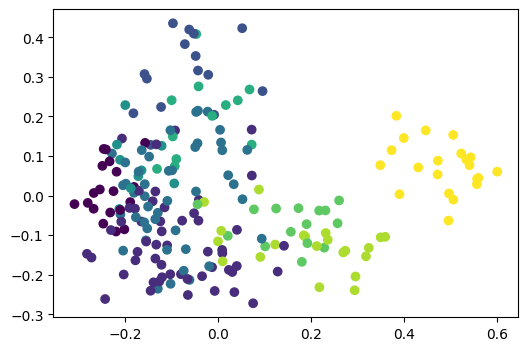

In [263]:
# << Visualization of Clusters Detected by K-Means >>
pca_2 = PCA(n_components=2)
pca_2.fit(df)
x_pca = pca_2.transform(df)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels)


<hr>
<h2 style="color:#9cff00">DBSCAN</h2>

<h4 style="color:#e5fa04">Advantages</h4>

1. <strong>Automatic Determination of Clusters:</strong> DBSCAN does not require the number of clusters to be specified in advance. It automatically detects the number of clusters based on the data's density distribution.
2. <strong>Robust to Noise:</strong> DBSCAN can handle noisy data effectively by classifying points that do not belong to any cluster as outliers.

3. <strong>Capable of Identifying Arbitrary Shapes:</strong> Unlike k-means, DBSCAN can identify clusters of arbitrary shapes and is not restricted to spherical clusters.
4. <strong>No Assumptions on Cluster Shapes:</strong> DBSCAN does not assume any specific shape or size for clusters, making it suitable for datasets with irregular cluster shapes and varying cluster densities.

<h4 style="color:#e5fa04">Disadvantages</h4>

1. <strong>Sensitive to Parameters:</strong> DBSCAN requires two parameters to be set: epsilon (ε), the maximum distance between two points to be considered neighbors, and minPts, the minimum number of points required to form a dense region (core point). Choosing these parameters can be challenging and may impact the clustering results.

2. <strong>Computational Complexity:</strong> DBSCAN has a higher computational complexity compared to k-means, especially for large datasets, as it requires calculating pairwise distances between all data points.

3. <strong>Difficulty with Varying Density:<strong></strong></strong> DBSCAN may struggle to cluster datasets with varying densities, as setting a single epsilon value may not capture all clusters accurately.

4. <strong>Difficulty with High-Dimensional Data:</strong> Like many clustering algorithms, DBSCAN can struggle with high-dimensional data due to the curse of dimensionality, where the distance between points becomes less meaningful in high-dimensional space.

In [745]:
pca_6 = PCA(n_components=6)
pca_6.fit(df)
x = pca_6.transform(df)

In [789]:
# << Fit the DBSCAN model >>
# with reference to https://sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

# dbscan = DBSCAN(eps=0.4, min_samples=5, metric='chebyshev')
# dbscan = DBSCAN(eps=0.5, min_samples=9, metric='chebyshev')
# dbscan = DBSCAN(eps=0.85, min_samples=10, metric='chebyshev')
dbscan = DBSCAN(eps=0.458, min_samples=4, metric='chebyshev')
clusters = dbscan.fit_predict(cosine_distances(x))

print(f"\n\033[1;30;43m{'Cluster Count:':<17}{len(np.unique(clusters))}")
print(f"\n\033[40;37m{clusters}")


Cluster Count:   9

[ 0  0  1  3  3  2  4  3  0  0  4  0  6  1  1  2  0 -1 -1  4  1  5  1  5
  4  6  1  4  1  6  2  0  4  4  7  2 -1 -1  1  2 -1  2  1  2  2  5  1 -1
  2  2 -1  5  1 -1 -1  6  4  2 -1  2  1  2  1  2 -1  4  6  2  6  5 -1  1
 -1  2  4  2  6  4  2  7  2  5  7 -1  2  2  1  5  6  5 -1  2  4  1  2 -1
 -1  2  2  2  2  1  5  2  2 -1  2  4  2 -1  4  5  1 -1  4  0  2  6 -1 -1
  4  1  5  4  2  2 -1  0  2  6  4  1  2  5  4  2  3  6  1  5 -1  5 -1  4
  1  1  2  5  6 -1  1  5  1 -1  2  2 -1 -1 -1 -1 -1  2 -1 -1  2 -1  1  2
  2  4  2  2  2 -1  2  4  2  5 -1 -1  0  4  2  6  2 -1  6  3 -1  1  5 -1
  2  4  2  7  6  4  6  5 -1  2 -1  2  5  6  3  5 -1 -1]


In [790]:
print(f"\n\033[1;30;43m{'Homogenity Score:':<21}{homogeneity_score(real_labels, clusters):.2f}"
    ,f"\n\n\033[1m{'Silhouette Score':<21}{silhouette_score(x, clusters):.2f}"
    ,f"\n\n\033[1;30;43m{'Completeness Score:':<21}{completeness_score(real_labels, clusters):.2f}"
    ,f"\n\n\033[1;30;43m{'V-Measure Score:':<21}{v_measure_score(real_labels, clusters):.2f}")


Homogenity Score:    0.51 

Silhouette Score     0.13 

Completeness Score:  0.60 

V-Measure Score:     0.55


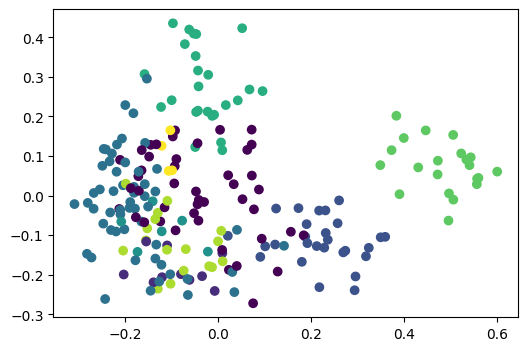

In [514]:
# << Visualization of DBSCAN result >>
pca_2=PCA(n_components=2)
pca.fit(df)
x_pca=pca.transform(df)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:,0],x_pca[:,1], c=clusters)

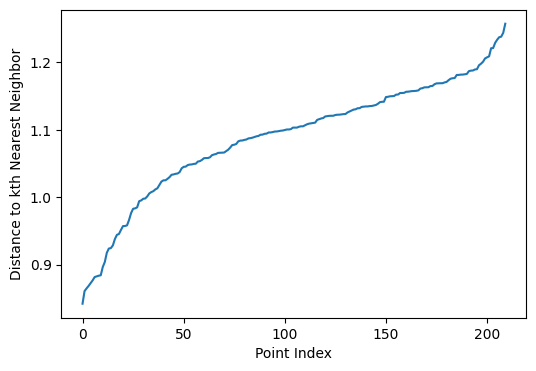

In [788]:
neigh = NearestNeighbors(n_neighbors=15)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

# Sort the k-distances
sorted_k_distances = np.sort(distances[:, -1])

# Plot the sorted k-distances
plt.figure(figsize=(6, 4))
plt.plot(sorted_k_distances[:210])
plt.xlabel('Point Index')
plt.ylabel('Distance to kth Nearest Neighbor')
plt.show()

<p></p>

<p><hr></p>

<p></p>

<h5 style="color:#e5fa04">3 Methods of Image Features Extraction</h5>

1. <strong>Convolutional Neural Networks (CNNs):</strong> CNNs have revolutionized the field of computer vision by automatically learning hierarchical representations of images. They consist of multiple layers, including convolutional layers that extract features through filters, pooling layers that reduce dimensionality, and fully connected layers for classification. CNNs like VGG, ResNet, and Inception are widely used for feature extraction in various tasks such as image classification, object detection, and image segmentation.

2. <strong>Histogram of Oriented Gradients (HOG):</strong> HOG is a traditional feature extraction technique that computes the distribution of gradients in an image. It works by dividing the image into small cells, calculating gradient magnitudes and orientations within each cell, and then creating histograms of gradient orientations. HOG features are often used in object detection and pedestrian detection tasks due to their effectiveness in capturing local shape and texture information.

3. <strong>Scale-Invariant Feature Transform (SIFT):</strong> SIFT is another classical method for extracting robust and distinctive features from images. It detects key points in an image that are invariant to scale, rotation, and illumination changes, and describes these key points based on local image gradients. SIFT features are widely used in applications such as image stitching, object recognition, and 3D reconstruction.
</p>

<br>
<h5 style="color:#e5fa04"> How PCA works? </h5>
<p>It begins by standardizing the data and then constructs a covariance matrix to capture the relationships between features. PCA decomposes this matrix into its eigenvectors and eigenvalues, selecting the top 'k' eigenvectors (principal components) corresponding to the largest eigenvalues. These components represent the directions of maximum variance in the data. By projecting the data onto these components, PCA creates a new lower-dimensional representation while retaining as much variance as possible, simplifying visualization and analysis while preserving essential information.</p>


<br>
<h5 style="color:#e5fa04"> How Homogeneity method works? </h5>
<p>Homogeneity measures class purity within clusters, assessing if all elements of the same class are grouped together. It's calculated using entropy-based methods, with a higher score indicating better clustering where each cluster predominantly contains data from one class.</p>

<br>
<h5 style="color:#e5fa04"> How Silhouette method works? </h5>
<p>The silhouette method quantifies cluster compactness and separation by computing two metrics for each data point: "a," the average distance to other points within the same cluster, and "b," the average distance to the nearest cluster it's not part of. The silhouette score, (b - a) / max(a, b), ranges from -1 to 1. Higher scores indicate well-clustered data points with small within-cluster distances (a) and large between-cluster distances (b). The average silhouette score across all points offers an overall measure of clustering quality, with higher values indicating better-defined clusters.</p>


<br>
<h5 style="color:#e5fa04">how to make the results of clustering better?</h5>
<p>The quality of features used for clustering can greatly impact the results. Carefully selecting relevant features, handling missing data, and performing feature scaling or normalization can enhance cluster separation.<br>
If the data has a high number of features, applying dimensionality reduction techniques like Principal Component Analysis (PCA) or t-SNE can help visualize and cluster the data more effectively.
</p>